# Geometric Brownian motion and logreturns

## Goals

## Contents

## References

## Imports and configuration

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from option_pricing import sim_brownian, sim_gbm, plot_sample_paths

## 1: Definition
Standard _geometric Brownian motion_ is  described by the following SDE:
$$dS_t=\mu S_tdt+\sigma S_tdW_t,\quad S_0 > 0,$$
Where
- $\mu$ is the drift term,
- $\sigma$ the volatility,
- $W_t$ standard Brownian motion as defined in notebook 01



## 2: Closed form solution using Itô
In order to find a solution, let us consider $X_t = \ln S_t$. Now applying Itô's formule to $dX_t$:
$$dX_t = \frac{1}{S_t}dS_t - \frac{1}{2}\frac{1}{S_t^2}dS_tdS_t (*)$$
Computing $dS_tdS_t = (\mu S_tdt+\sigma S_tdW_t)^2$ using Itô's multiplication rules, we find
$$dS_tdS_t = \sigma^2 S_t^2 dt$$
Substituting this along with our formula for $dS_t$ in $(*)$
$$dX_t = \mu dt + \sigma dW_t - \frac{1}{2}\sigma^2 dt$$
$$dX_t = (\mu - \frac{1}{2}\sigma^2)dt + \sigma dW_t $$
Integrating from 0 to t:
$$X_t = X_0 + (\mu - \frac{1}{2}\sigma^2)t + \sigma W_t \rightarrow \ln S_t = \ln S_0 + (\mu - \frac{1}{2}\sigma^2)t + \sigma W_t$$
Where taking the exponents gives us the final result:
$$S_t = S_0 \exp((\mu - \frac{1}{2}\sigma^2)t + \sigma W_t)$$

## GBM path simulation
Let's simulate some price paths with the following configuration:

In [10]:
# --- Parameters ---
n_paths = 10000   # number of paths for statistics
steps = 1000
T = 1.0 # End time
dt = T / steps # timestep
t = np.linspace(0, T, steps+1)

mu = 1 # Mean rate of return
sigma = 1 # Volatity?
S0 = 1.0 # Start val


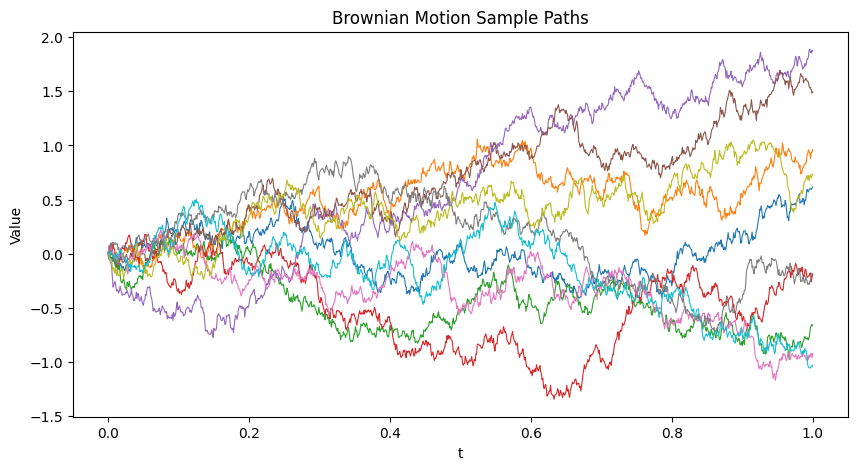

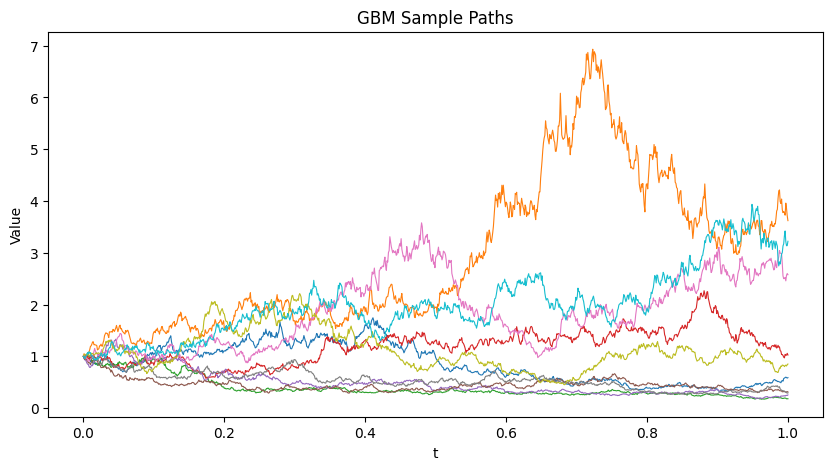

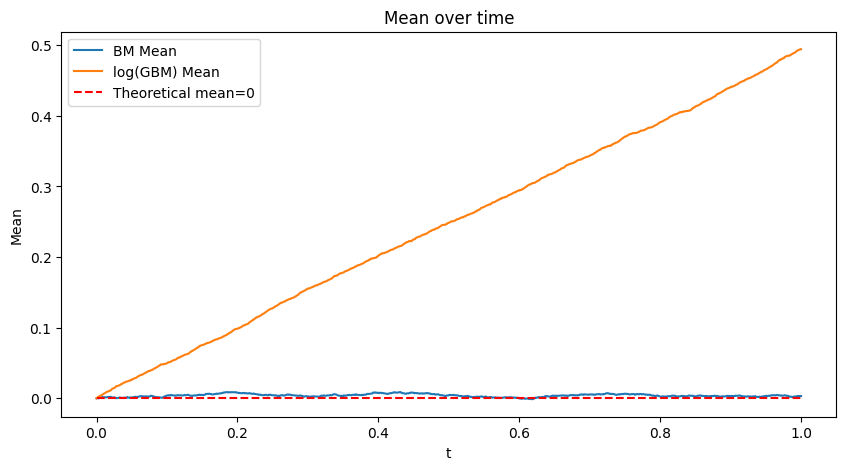

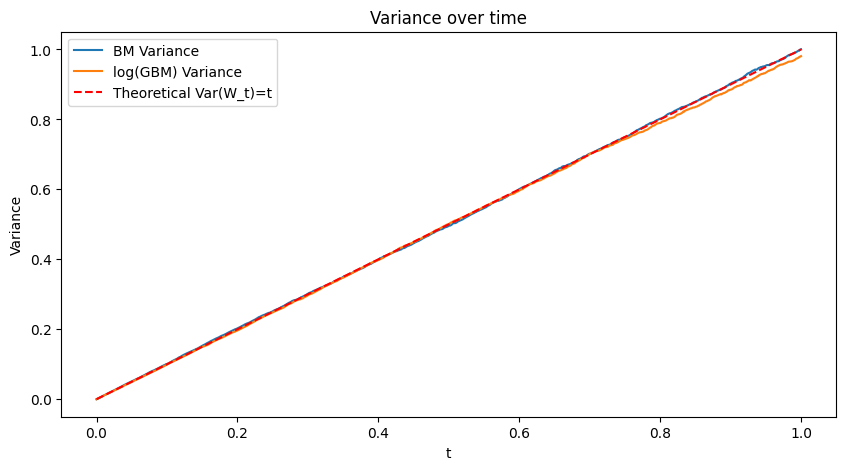

In [11]:
# --- Simulate BM and GBM ---
BM_paths = sim_brownian(n_paths, steps, dt)
GBM_paths, GBM_BM = sim_gbm(n_paths, steps, dt, mu=mu, sigma=sigma, S0=S0)

# --- Plot some sample paths ---
plot_sample_paths(t, BM_paths, n_plot=10, title="Brownian Motion Sample Paths")
plot_sample_paths(t, GBM_paths, n_plot=10, title="GBM Sample Paths")

# --- Compare statistics: mean and variance ---
mean_BM = np.mean(BM_paths, axis=0)
var_BM = np.var(BM_paths, axis=0, ddof=0)

mean_GBM_log = np.mean(np.log(GBM_paths), axis=0)
var_GBM_log = np.var(np.log(GBM_paths), axis=0, ddof=0)

# Plot mean over time
plt.figure(figsize=(10,5))
plt.plot(t, mean_BM, label="BM Mean")
plt.plot(t, mean_GBM_log, label="log(GBM) Mean")
plt.hlines(0, 0, T, colors='r', linestyles='--', label="Theoretical mean=0")
plt.title("Mean over time")
plt.xlabel("t")
plt.ylabel("Mean")
plt.legend()
plt.show()

# Plot variance over time
plt.figure(figsize=(10,5))
plt.plot(t, var_BM, label="BM Variance")
plt.plot(t, var_GBM_log, label="log(GBM) Variance")
plt.plot(t, t, 'r--', label="Theoretical Var(W_t)=t")
plt.title("Variance over time")
plt.xlabel("t")
plt.ylabel("Variance")
plt.legend()
plt.show()
